<a href="https://colab.research.google.com/github/takashinnosuke/study_Keras/blob/main/News_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = \
  reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


ニュースサンプルをテキストに変換する

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = \
  dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

decoded_newswire

565248/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

データのエンコーディング

In [12]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
#モデルの構築
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
#検証データセットの設定
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
#モデルの訓練
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 74ms/step - loss: 2.7103 - accuracy: 0.4568 - val_loss: 1.7765 - val_accuracy: 0.6220
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.4648 - accuracy: 0.6926 - val_loss: 1.3124 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0783 - accuracy: 0.7726 - val_loss: 1.1718 - val_accuracy: 0.7290
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.8444 - accuracy: 0.8242 - val_loss: 1.0390 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6707 - accuracy: 0.8616 - val_loss: 0.9655 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5381 - accuracy: 0.8884 - val_loss: 0.9142 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 53ms/step - loss: 0.4328 - accuracy: 0.9126 - val_loss: 0.8923 - val_accuracy: 0.8110
Epoch 8/20
16

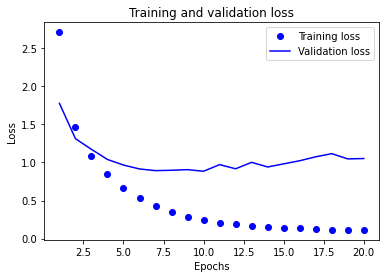

In [18]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()